In [206]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sklearn
import seaborn as sns

In [207]:
df = pd.read_csv('dataa.csv')
df.shape

(60, 10)

In [208]:
df.head()

,first_name,last_name,Technical_trait,Personal_trait,Social_characteristics,Technical_traits,Personal_traits,Social_characteristic,Class,Criminal
0,Hall,Buxsey,0.169630,0.332569,0.092554,0.2,0.3,0.1,0.6,0
1,Roselin,Vlasenko,0.844385,0.934350,0.378125,0.8,0.9,0.4,2.1,1
2,Anatole,Colecrough,0.363624,0.892332,0.043836,0.4,0.9,0.0,1.3,0
3,Bryana,O'Crevan,0.218067,0.020410,0.861217,0.2,0.0,0.9,1.1,0
4,Ferdie,Cussons,0.336268,0.203978,0.203958,0.3,0.2,0.2,0.7,0


In [210]:
df.drop(['first_name', 'last_name'], axis='columns', inplace=True)

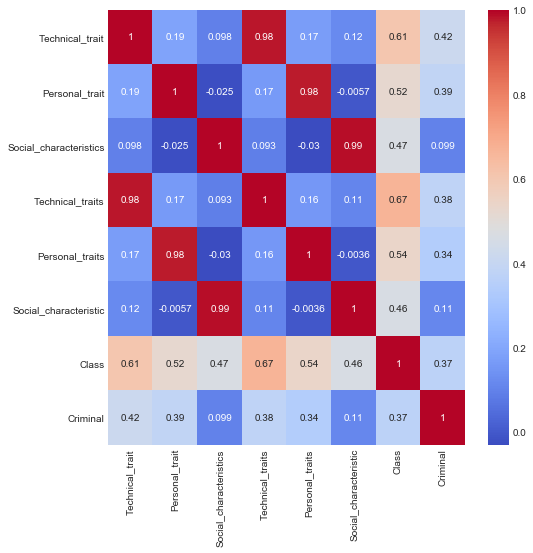

In [211]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [212]:
from matplotlib import style
style.use('seaborn-whitegrid')

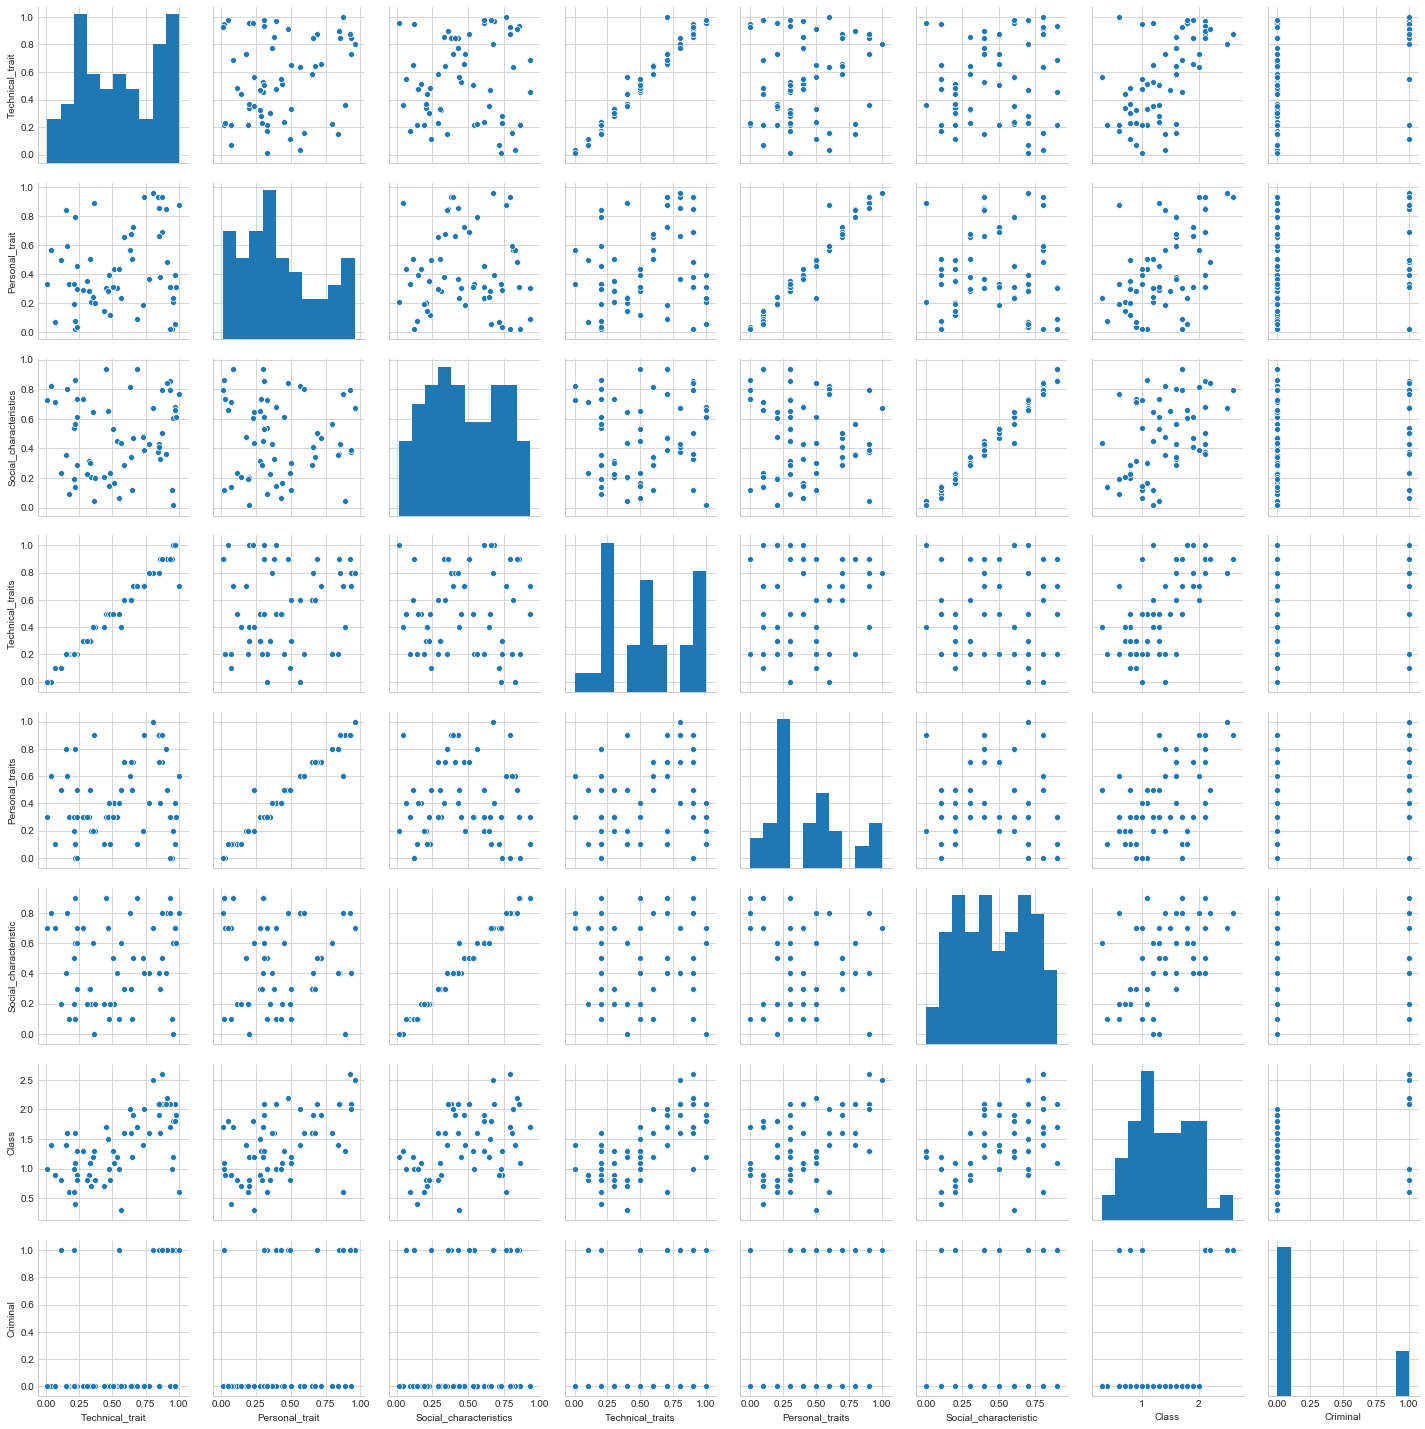

In [213]:
plt.rcParams['figure.figsize'] = (10,10)
sns.pairplot(df)
plt.savefig('pairplot.png')

In [215]:
from sklearn.neighbors import KNeighborsClassifier
df.head()

,Technical_trait,Personal_trait,Social_characteristics,Technical_traits,Personal_traits,Social_characteristic,Class,Criminal
0,0.169630,0.332569,0.092554,0.2,0.3,0.1,0.6,0
1,0.844385,0.934350,0.378125,0.8,0.9,0.4,2.1,1
2,0.363624,0.892332,0.043836,0.4,0.9,0.0,1.3,0
3,0.218067,0.020410,0.861217,0.2,0.0,0.9,1.1,0
4,0.336268,0.203978,0.203958,0.3,0.2,0.2,0.7,0


In [216]:
X=df[['Technical_traits','Personal_traits','Social_characteristic','Class']]
y=df[['Criminal']]

In [219]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [220]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [221]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_train, y_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [222]:
y_pred = classifier.predict(X_test)

In [223]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0]
 [ 1  1]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.50      0.67         2

    accuracy                           0.92        12
   macro avg       0.95      0.75      0.81        12
weighted avg       0.92      0.92      0.90        12



In [224]:
print("Mean absolute error =", sklearn.metrics.mean_absolute_error(y_test, y_pred)) 
print("Mean squared error =", sklearn.metrics.mean_squared_error(y_test,y_pred)) 
print("Median absolute error =", sklearn.metrics.median_absolute_error(y_test,y_pred)) 
print("Explain variance score =", sklearn.metrics.explained_variance_score(y_test, y_pred)) 
print("R2 score =", sklearn.metrics.r2_score(y_test, y_pred))

Mean absolute error = 0.08333333333333333
Mean squared error = 0.08333333333333333
Median absolute error = 0.0
Explain variance score = 0.45000000000000007
R2 score = 0.3999999999999999
